# Projeto de Análise de Crédito

## Carregando Pacotes

In [110]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## Carregando Dados

In [83]:
df = pd.read_csv('dados.csv')

In [84]:
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


## Entendimento dos Dados

### Univariada

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [86]:
df.possui_celular.value_counts()

1    16650
Name: possui_celular, dtype: int64

<Axes: xlabel='possui_fone', ylabel='count'>

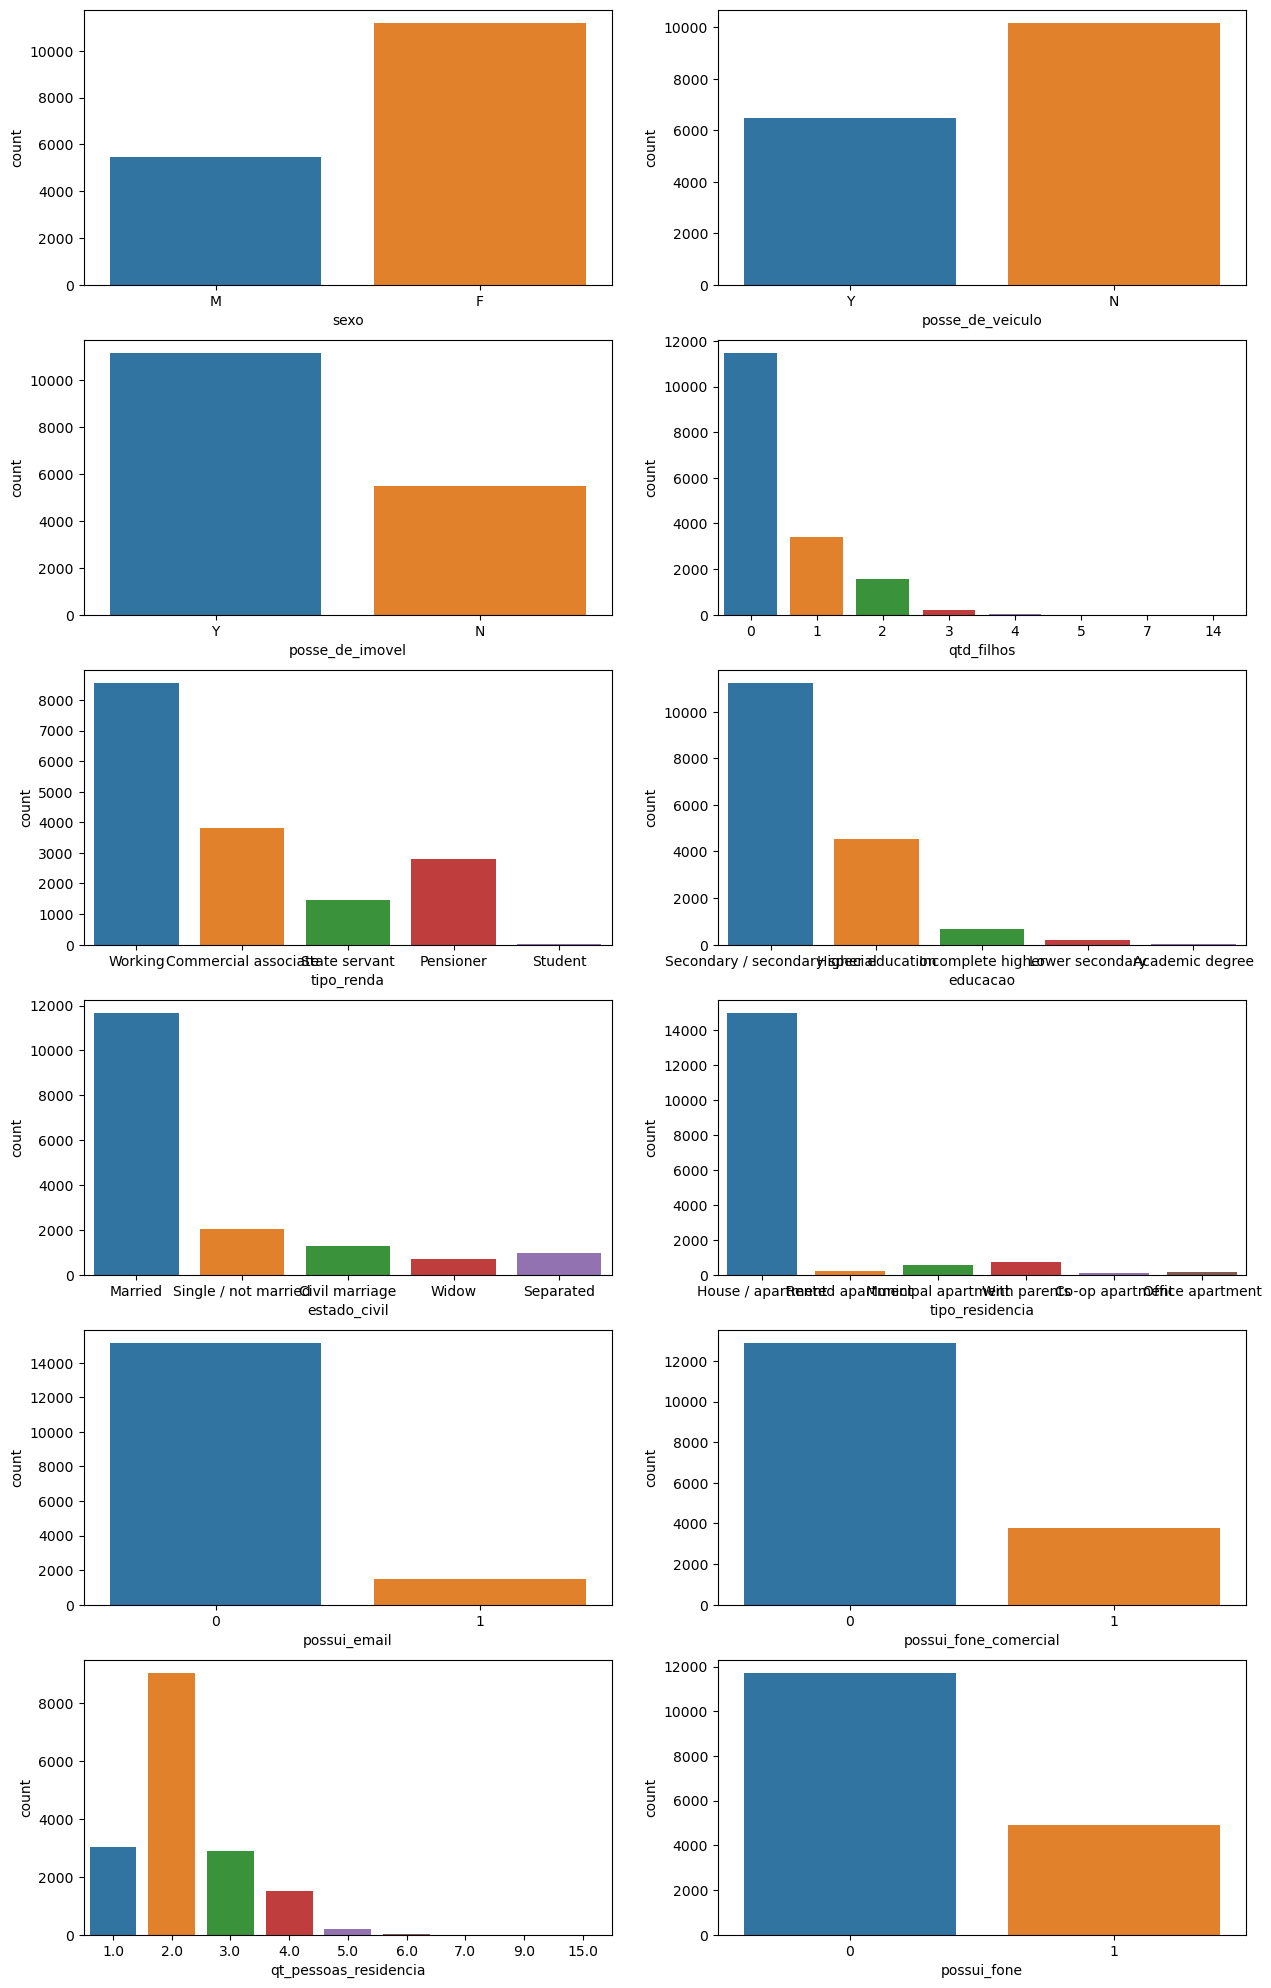

In [87]:
plt.rc('figure', figsize=(15, 25)) #Configurando o tamanho da figura
fig, axes = plt.subplots(6, 2) #Configurando 4 gráficos (2 x 2)
#Configurando cada um dos gráficos
sns.countplot(ax = axes[0, 0], x='sexo', data=df)
sns.countplot(ax = axes[0, 1], x='posse_de_veiculo', data=df)
sns.countplot(ax = axes[1, 0], x='posse_de_imovel', data=df)
sns.countplot(ax = axes[1, 1], x='qtd_filhos', data=df)
sns.countplot(ax = axes[2, 0], x='tipo_renda', data=df)
sns.countplot(ax = axes[2, 1], x='educacao', data=df)
sns.countplot(ax = axes[3, 0], x='estado_civil', data=df)
sns.countplot(ax = axes[3, 1], x='tipo_residencia', data=df)
sns.countplot(ax = axes[4, 0], x='possui_email', data=df)
sns.countplot(ax = axes[4, 1], x='possui_fone_comercial', data=df)
sns.countplot(ax = axes[5, 0], x='qt_pessoas_residencia', data=df)
sns.countplot(ax = axes[5, 1], x='possui_fone', data=df)

### Bivariada

<Axes: xlabel='mau'>

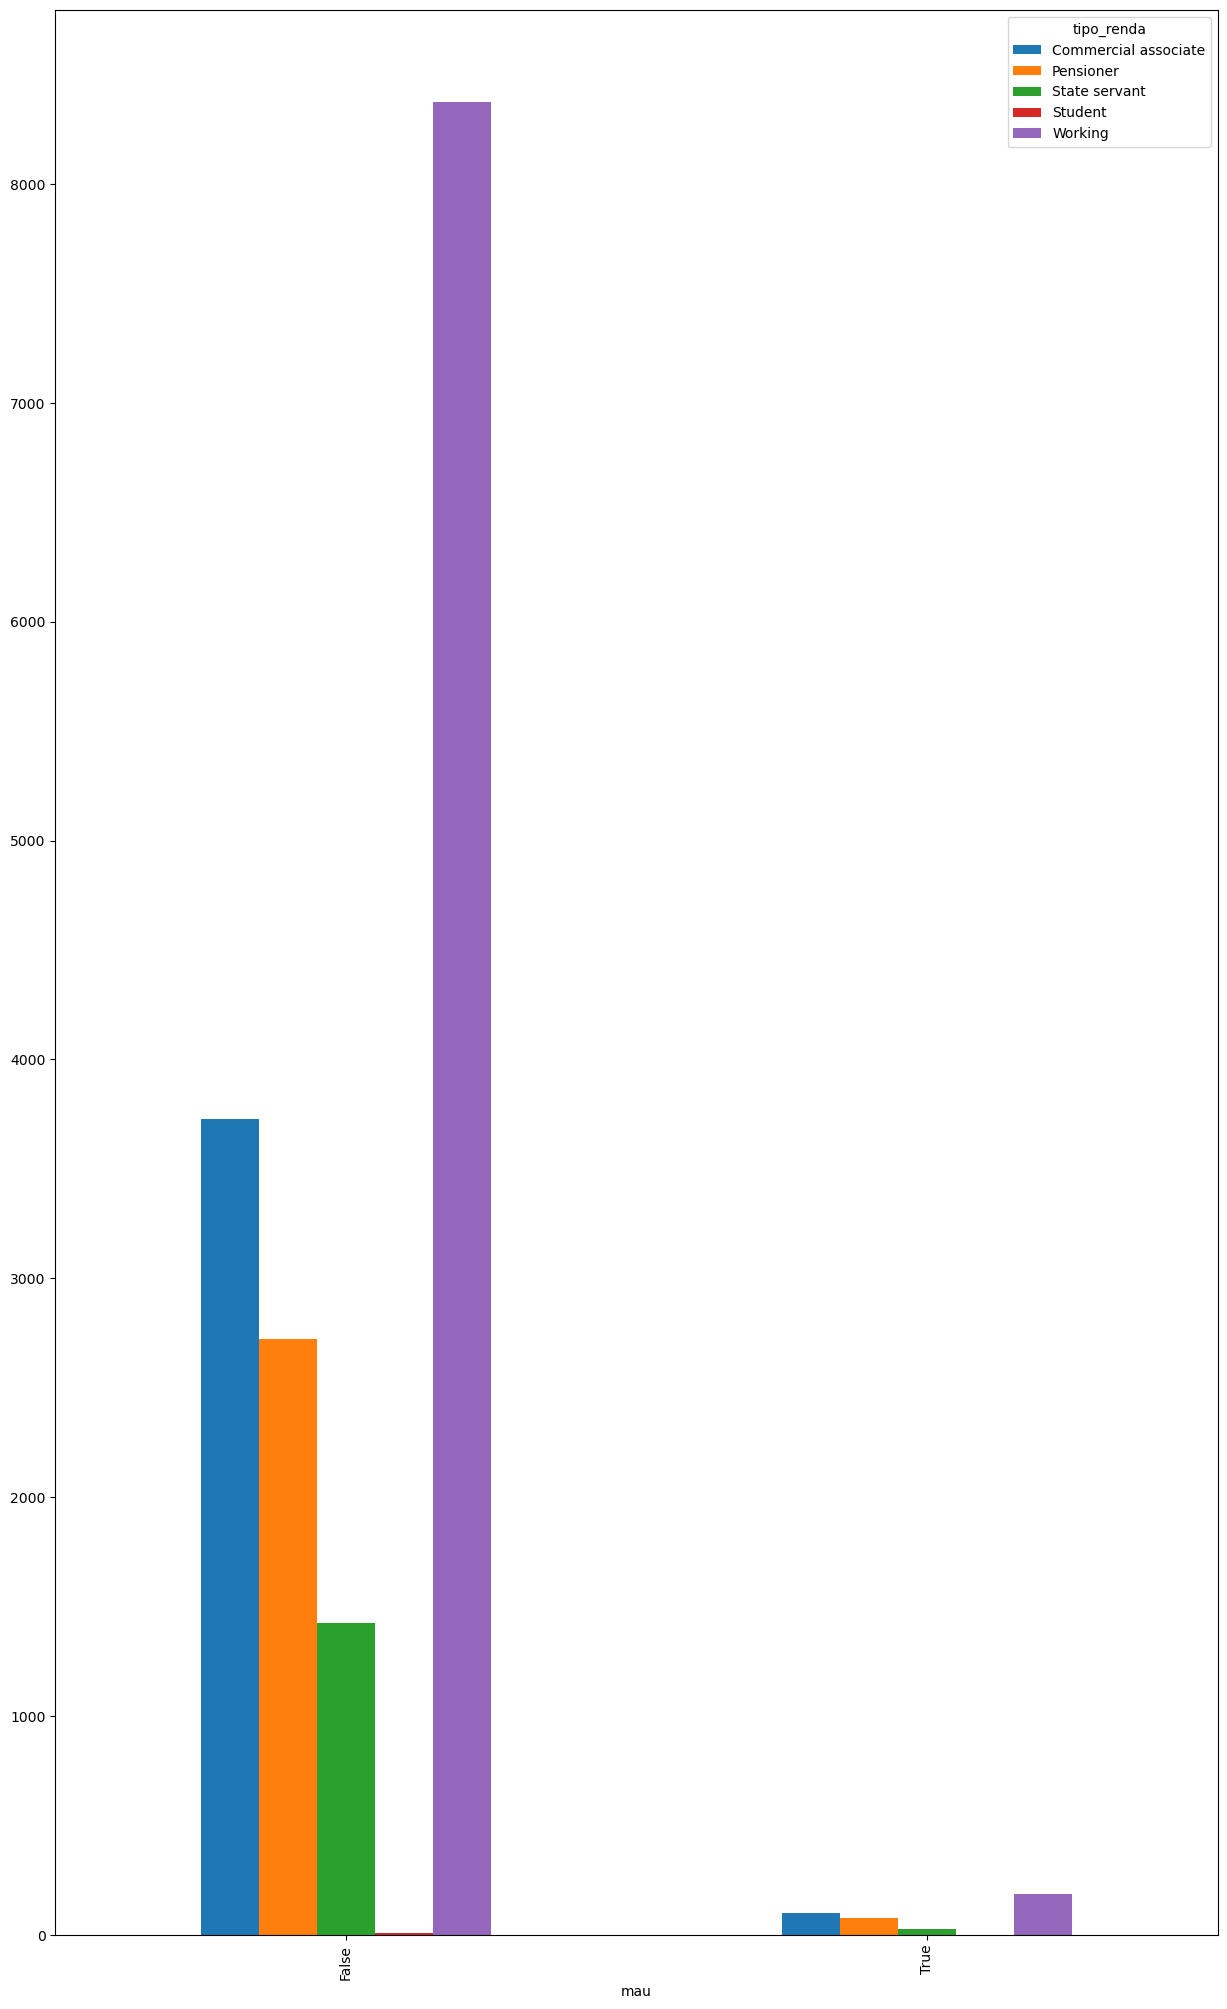

In [88]:
pd.crosstab(df['mau'], df['tipo_renda']).plot.bar()

<Axes: xlabel='mau'>

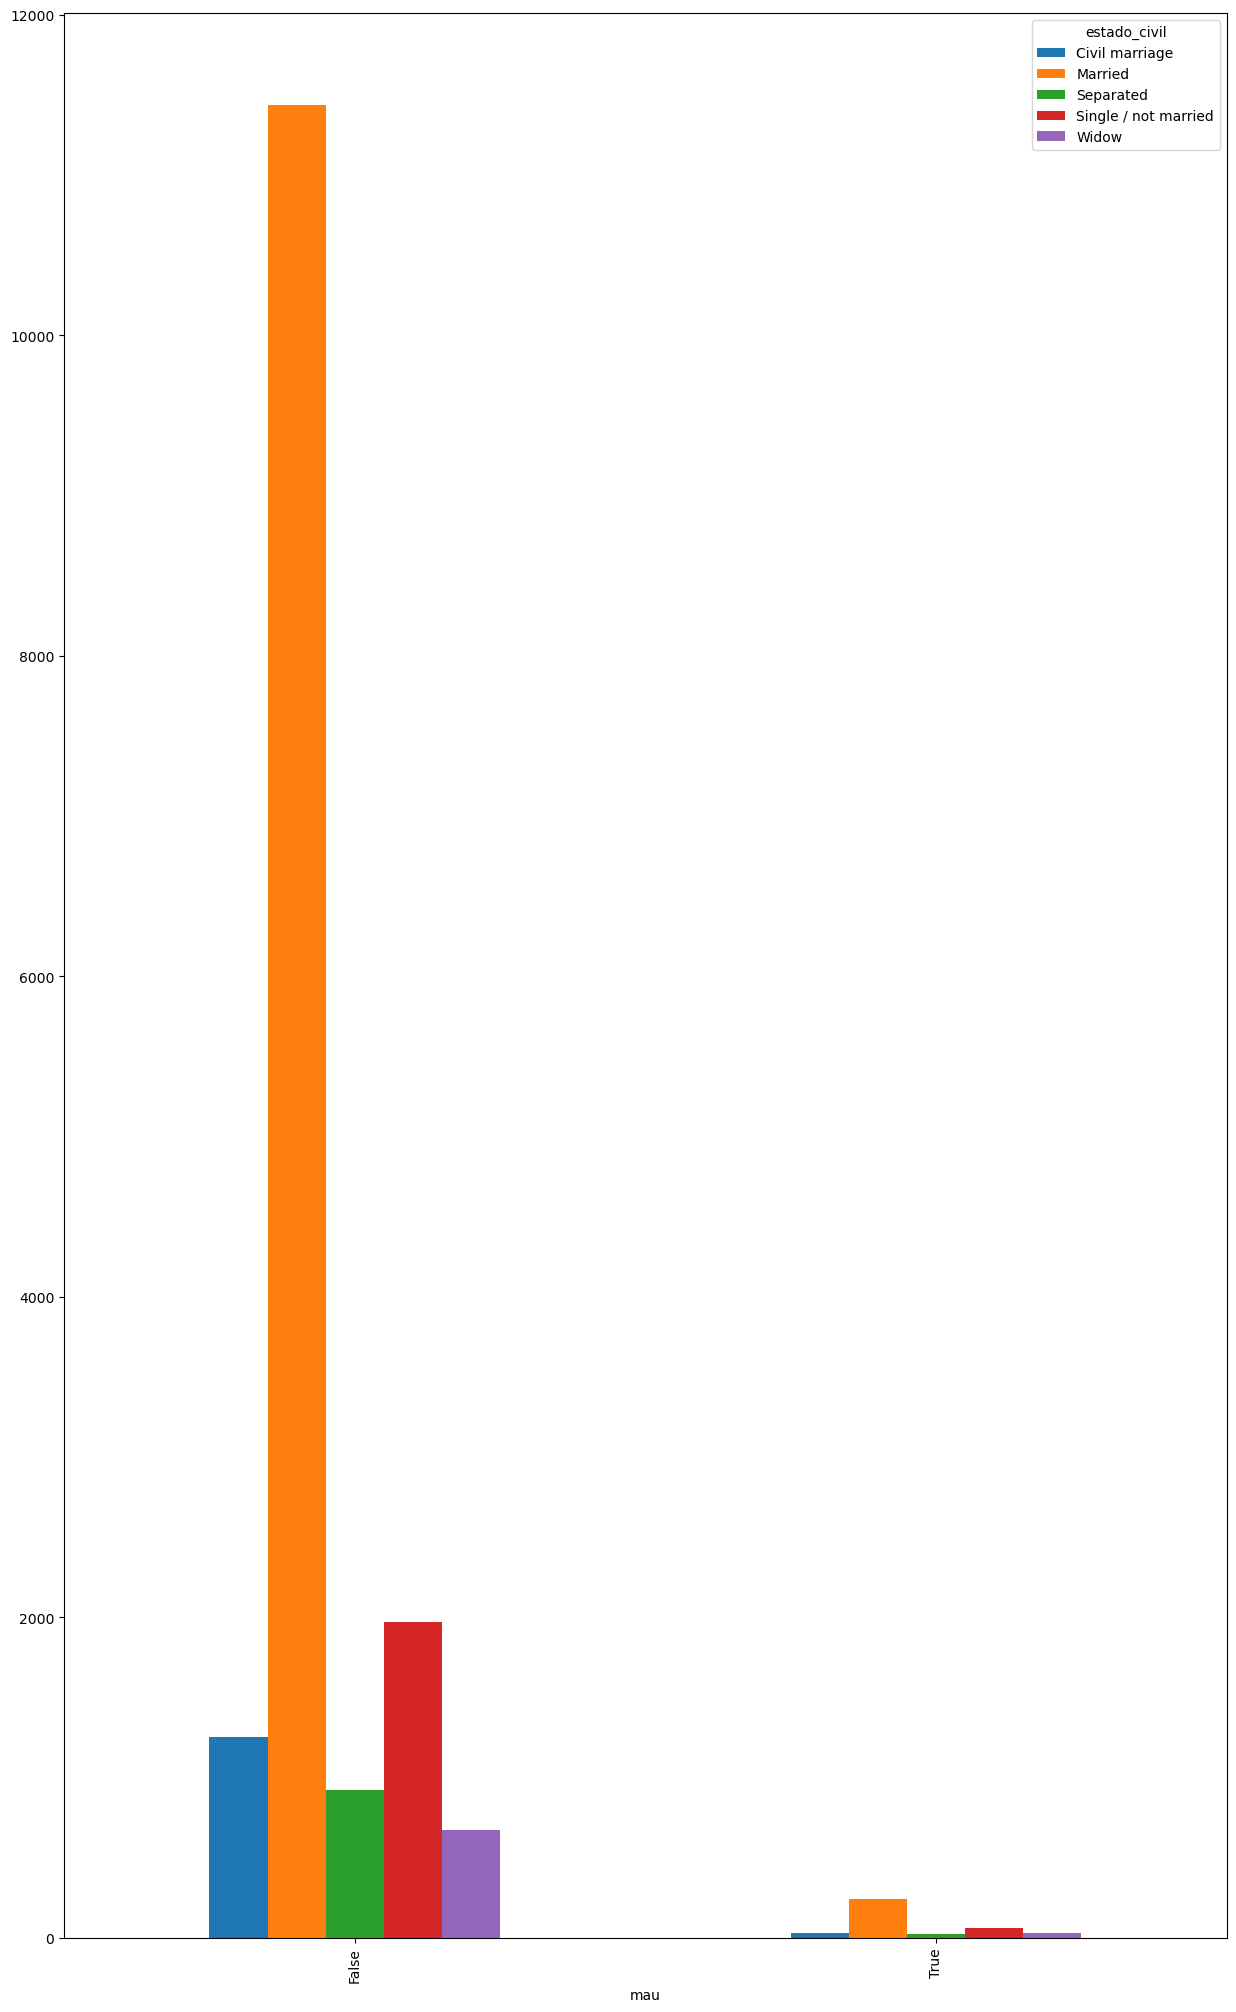

In [89]:
pd.crosstab(df['mau'], df['estado_civil']).plot.bar()

## Preparação dos dados

In [90]:
df.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [91]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [92]:
df = df.drop_duplicates() # Removendo dados duplicados

In [93]:
df.shape

(6770, 16)

In [94]:
df_encoded = pd.get_dummies(df, columns = ['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'sexo'], drop_first = True)

In [95]:
df_encoded

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,sexo_M
0,Y,Y,0,58.832877,3.106849,1,0,0,0,2.0,...,1,0,0,0,1,0,0,0,0,1
1,N,Y,0,52.356164,8.358904,1,0,1,1,1.0,...,0,0,1,0,1,0,0,0,0,0
3,Y,Y,0,46.224658,2.106849,1,1,1,1,2.0,...,1,0,0,0,1,0,0,0,0,1
4,Y,N,0,29.230137,3.021918,1,0,0,0,2.0,...,1,0,0,0,1,0,0,0,0,0
6,N,Y,0,27.482192,4.024658,1,0,1,0,2.0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16644,N,Y,1,34.857534,3.101370,1,1,1,0,1.0,...,0,0,1,0,1,0,0,0,0,0
16645,N,Y,0,54.109589,9.884932,1,0,0,0,2.0,...,0,0,0,0,1,0,0,0,0,0
16646,N,Y,0,43.389041,7.380822,1,1,1,0,2.0,...,1,0,0,0,1,0,0,0,0,0
16647,Y,Y,0,30.005479,9.800000,1,1,0,0,2.0,...,1,0,0,0,1,0,0,0,0,1


In [96]:
df_encoded.posse_de_veiculo = df_encoded.posse_de_veiculo.map({'Y': 1, 'N':0})

In [97]:
df_encoded.posse_de_imovel = df_encoded.posse_de_imovel.map({'Y': 1, 'N':0})

In [98]:
df_encoded.dtypes

posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
tipo_renda_Pensioner                        uint8
tipo_renda_State servant                    uint8
tipo_renda_Student                          uint8
tipo_renda_Working                          uint8
educacao_Higher education                   uint8
educacao_Incomplete higher                  uint8
educacao_Lower secondary                    uint8
educacao_Secondary / secondary special      uint8
estado_civil_Married                        uint8


## Modelagem

### Criando a base de treino e teste

In [99]:
y = df_encoded.mau #Target

In [100]:
x = df_encoded.drop('mau', axis = 1) #Explicativa

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

### Rodando o modelo

In [102]:
clf = DecisionTreeClassifier(random_state=100)

In [103]:
clf = clf.fit(x_train, y_train) # Treinando modelo

In [104]:
predicao_train = clf.predict(x_train) #Esta variável armazena o resultado ('mau') da árvore de decisão com base nas variáveis de teste.

In [105]:
acc = metrics.accuracy_score(y_train, predicao_train)
print('Acurácia: {0:.2f}% em cima dos dados de treino.'.format(acc*100))

Acurácia: 98.52% em cima dos dados de treino.


In [106]:
predicao_test = clf.predict(x_test) #Fazendo predição com dados de teste

In [107]:
acc_test = metrics.accuracy_score(y_test, predicao_test)
print('Acurácia: {0:.2f}% em cima dos dados de teste.'.format(acc_test*100))

Acurácia: 91.78% em cima dos dados de teste.


### Matriz de Confusão

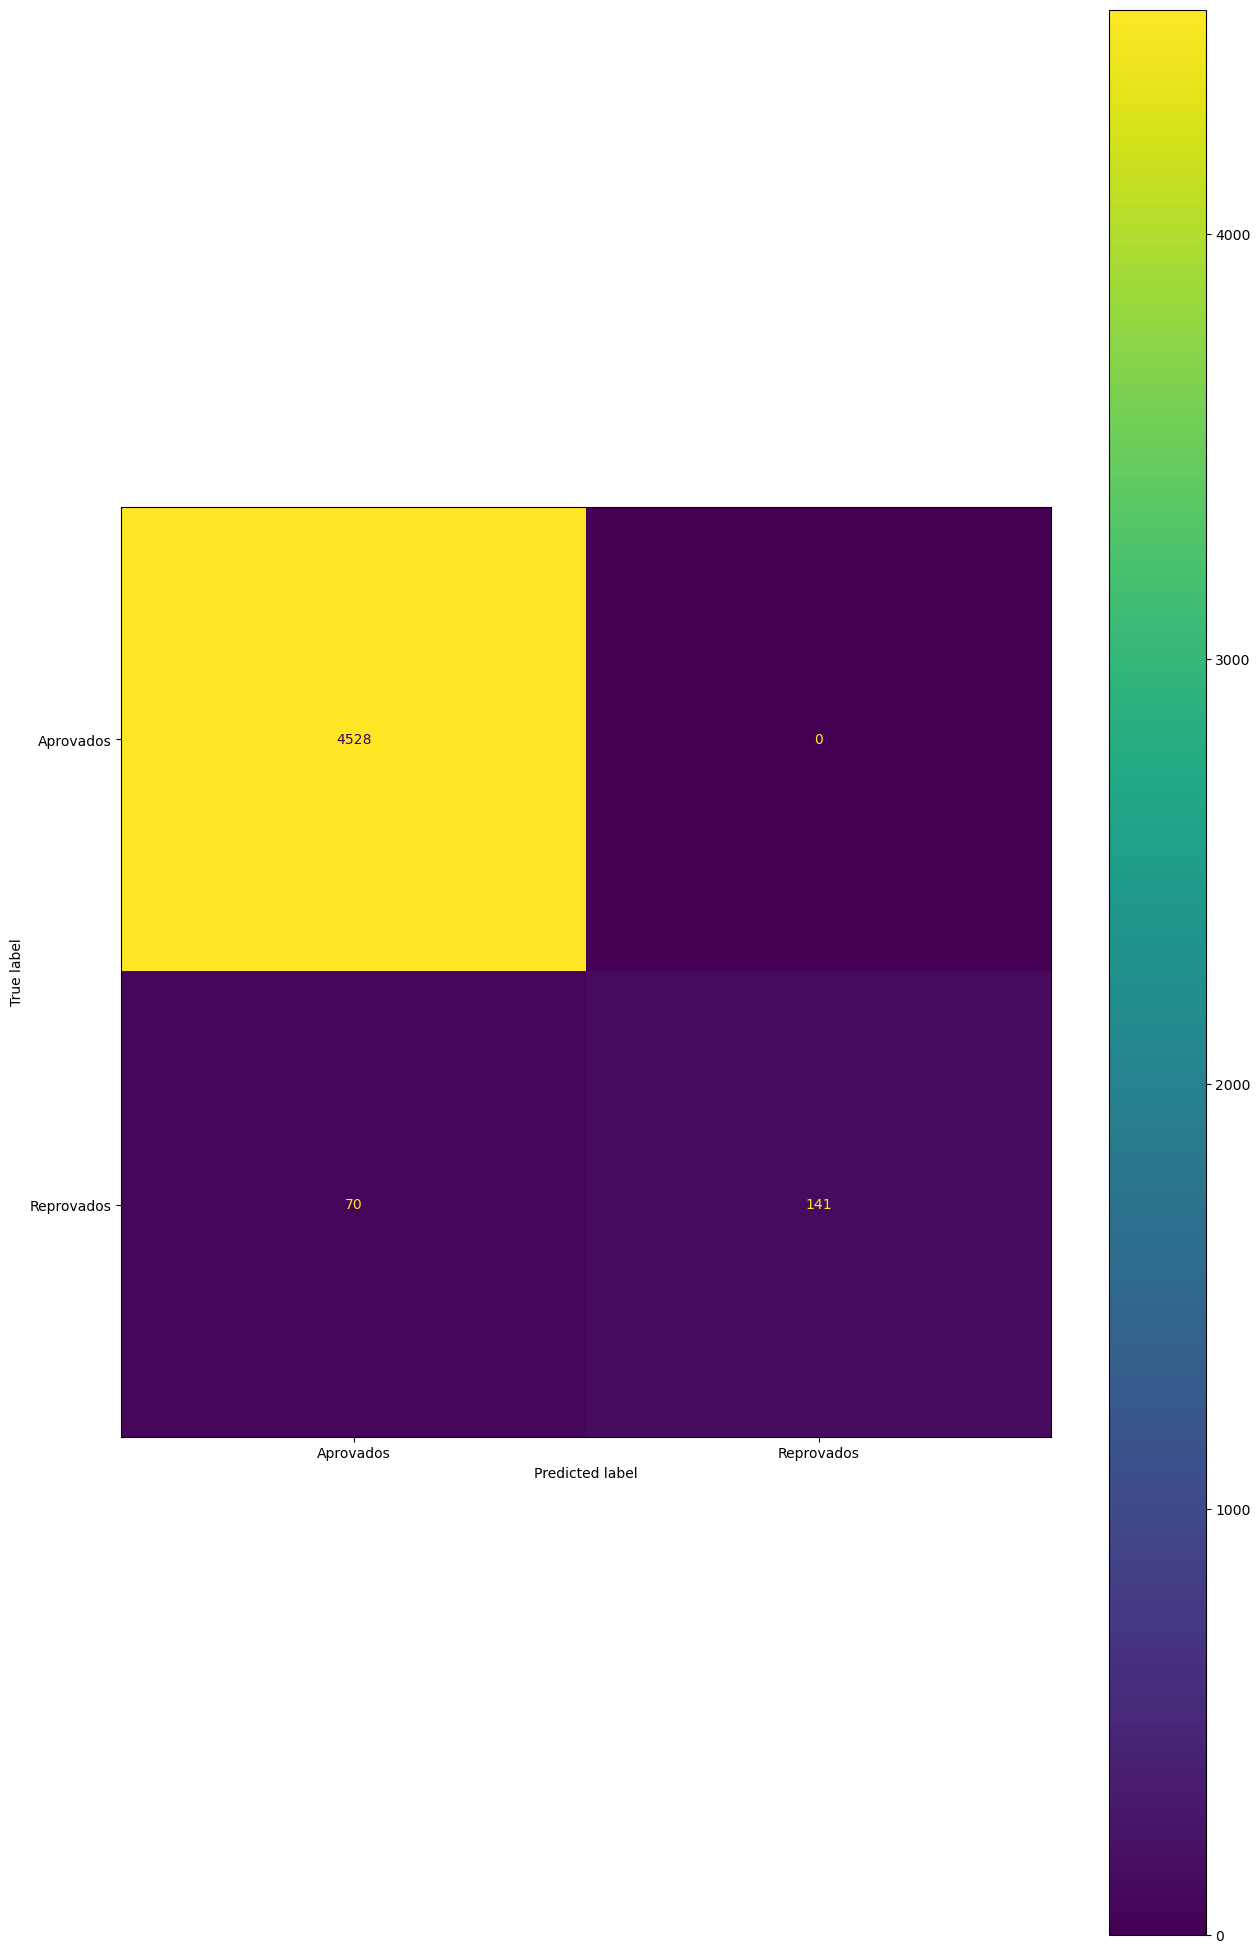

In [111]:
cm = confusion_matrix(y_train, predicao_train, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()